# Community Detection Example 

Implement from this [site](https://python-louvain.readthedocs.io/en/latest/)

Beware of install using `pip install python-louvain`

## Key Concepts:

Maximum the modularity

1. Modularity
For the disjoint sets, modularity propotional to the difference between (# of edegs in the group and the expected # edges inside the group)

2. Use Null model to get the expected # edges inside the group 


[Source from Stanford CS224W 2019 Fall](http://snap.stanford.edu/class/cs224w-2019/slides/04-communities.pdf)


Forom this example, the `karate_club_graph` from networkx is used as an graph example to demostarte the Louvain community detection method.

1. First load the `karate_club_graph`
2. Use `best_partition()` to find the best partition of the graph
3. Draw the graph using networkx's `draw_network_nodes` and `draw_network_edges`

In [2]:
import community as community_louvain
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import networkx as nx  

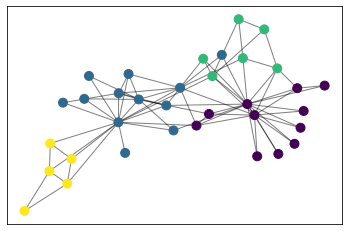

In [7]:
# load the karate club graph
G = nx.karate_club_graph()

# first compute the best partition
partition = community_louvain.best_partition(G)
# draw the graph
pos = nx.spring_layout(G)

# color the nodes based on the partitions
cmap = cm.get_cmap('viridis', max(partition.values())+1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=80,cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()



In [9]:
partition.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [11]:
partition.values()

dict_values([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0])

In [13]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [14]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

## Implement American Colledge Football Community

In [20]:
import urllib.request as urllib
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]

In [21]:
G_ball = nx.parse_gml(gml)  # parse gml data

In [22]:
print(txt)

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)



BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDiegoState        11
Baylor               10
NorthTexas           10
NorthernIllinois     10
Northwestern         11
WesternMichigan      10
Wisconsin            12
Wyoming              11
Auburn               11
Akron                11
VirginiaTech         11
Alabama              11
UCLA                 11
Arizona              11
Utah                 11
ArkansasState        10
NorthCarolinaState   11
BallState            10
Florida              11
BoiseState            9
BostonCollege        11
WestVirginia         11
BowlingGreenState    11
Michigan             11
Virginia             10
Buffalo              11
Syracuse             11
CentralFlorida        8
GeorgiaTech          11
CentralMichigan      11
Purdue               11
Colorado             11
ColoradoState   

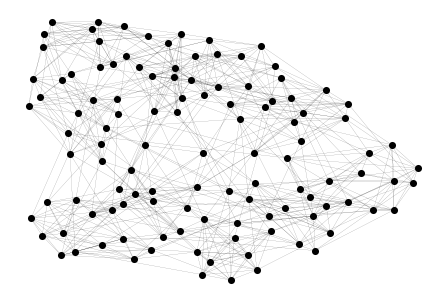

In [23]:
for n, d in G_ball.degree():
    print(f"{n:20} {d:2}")

options = {
    "node_color": "black",
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
}
nx.draw(G_ball, **options)
plt.show()

### Implement commnity detection

In [25]:
partition = community_louvain.best_partition(G_ball)

115

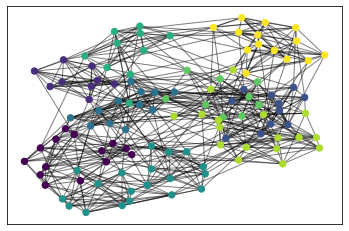

In [29]:
# draw the graph
pos = nx.spring_layout(G_ball)

# color the nodes based on the partitions
cmap = cm.get_cmap('viridis', max(partition.values())+1)
nx.draw_networkx_nodes(G_ball, pos, partition.keys(), node_size=40,cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(G_ball, pos, alpha=0.5)
plt.show()

In [33]:
set(partition.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [38]:
from collections import defaultdict
group_dict = defaultdict(list)
for k,v in partition.items():
    group_dict[v].append(k)

In [39]:
group_dict

defaultdict(list,
            {0: ['BrighamYoung',
              'NewMexico',
              'SanDiegoState',
              'NorthTexas',
              'Wyoming',
              'Utah',
              'ArkansasState',
              'BoiseState',
              'ColoradoState',
              'Idaho',
              'NewMexicoState',
              'UtahState',
              'AirForce',
              'NevadaLasVegas'],
             1: ['FloridaState',
              'NorthCarolinaState',
              'Virginia',
              'GeorgiaTech',
              'Duke',
              'NorthCarolina',
              'Clemson',
              'WakeForest',
              'Maryland'],
             2: ['Iowa',
              'PennState',
              'Northwestern',
              'Wisconsin',
              'Michigan',
              'Purdue',
              'OhioState',
              'Minnesota',
              'Illinois',
              'MichiganState',
              'Indiana'],
             3: ['KansasState',
